In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:
df=pd.read_csv("Leads.csv")

### Step 1: Inspect the Data

In [476]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [477]:

# Check for duplicates
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")
print("Duplicate rows:")
print(duplicate_rows)


Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]


In [478]:
### Checking the  conversion rate
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_rate

38.53896103896104

We have almost 40% conversion rate

In [479]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [480]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [481]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Convert Select to NAN

In [482]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

df = df.replace('Select', np.nan)

In [483]:
# Checking missing data percentage in the updated dataframe

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Lead Origi

In [484]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [485]:
df.shape

(9240, 37)

In [486]:
# Dropping other irrelevant 
df=df.drop(["Prospect ID","Lead Number"  ],axis=1)

In [487]:
df.shape

(9240, 35)

In [488]:
# Listing the categorical variables yet to be encoded
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9204 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Do Not Call                                    9240 non-null   object
 4   Last Activity                                  9137 non-null   object
 5   Country                                        6779 non-null   object
 6   Specialization                                 5860 non-null   object
 7   How did you hear about X Education             1990 non-null   object
 8   What is your current occupation                6550 non-null   object
 9   What matters most to you in choosing a course  6531 non-null   

In [489]:
df.shape

(9240, 35)

In [490]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Data Preparation

#### Converting binary variables (Yes/No) to 1/0


In [491]:

def convert_binary_columns_to_numeric(df):
    """
    Convert binary columns (Yes/No) to 1/0 in a pandas DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data

    Returns:
    - None (modifies df in place)
    """
    for column in df.columns:
        if df[column].isin(['Yes', 'No']).all():
            df[column] = df[column].map({'Yes': 1, 'No': 0})

In [492]:
convert_binary_columns_to_numeric(df)
df.head() # Print first few rows to verify

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

#### Analyze & Delete Unnecessary Columns 

In [494]:
# Checking missing data percentage in the updated dataframe

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Lead Origi

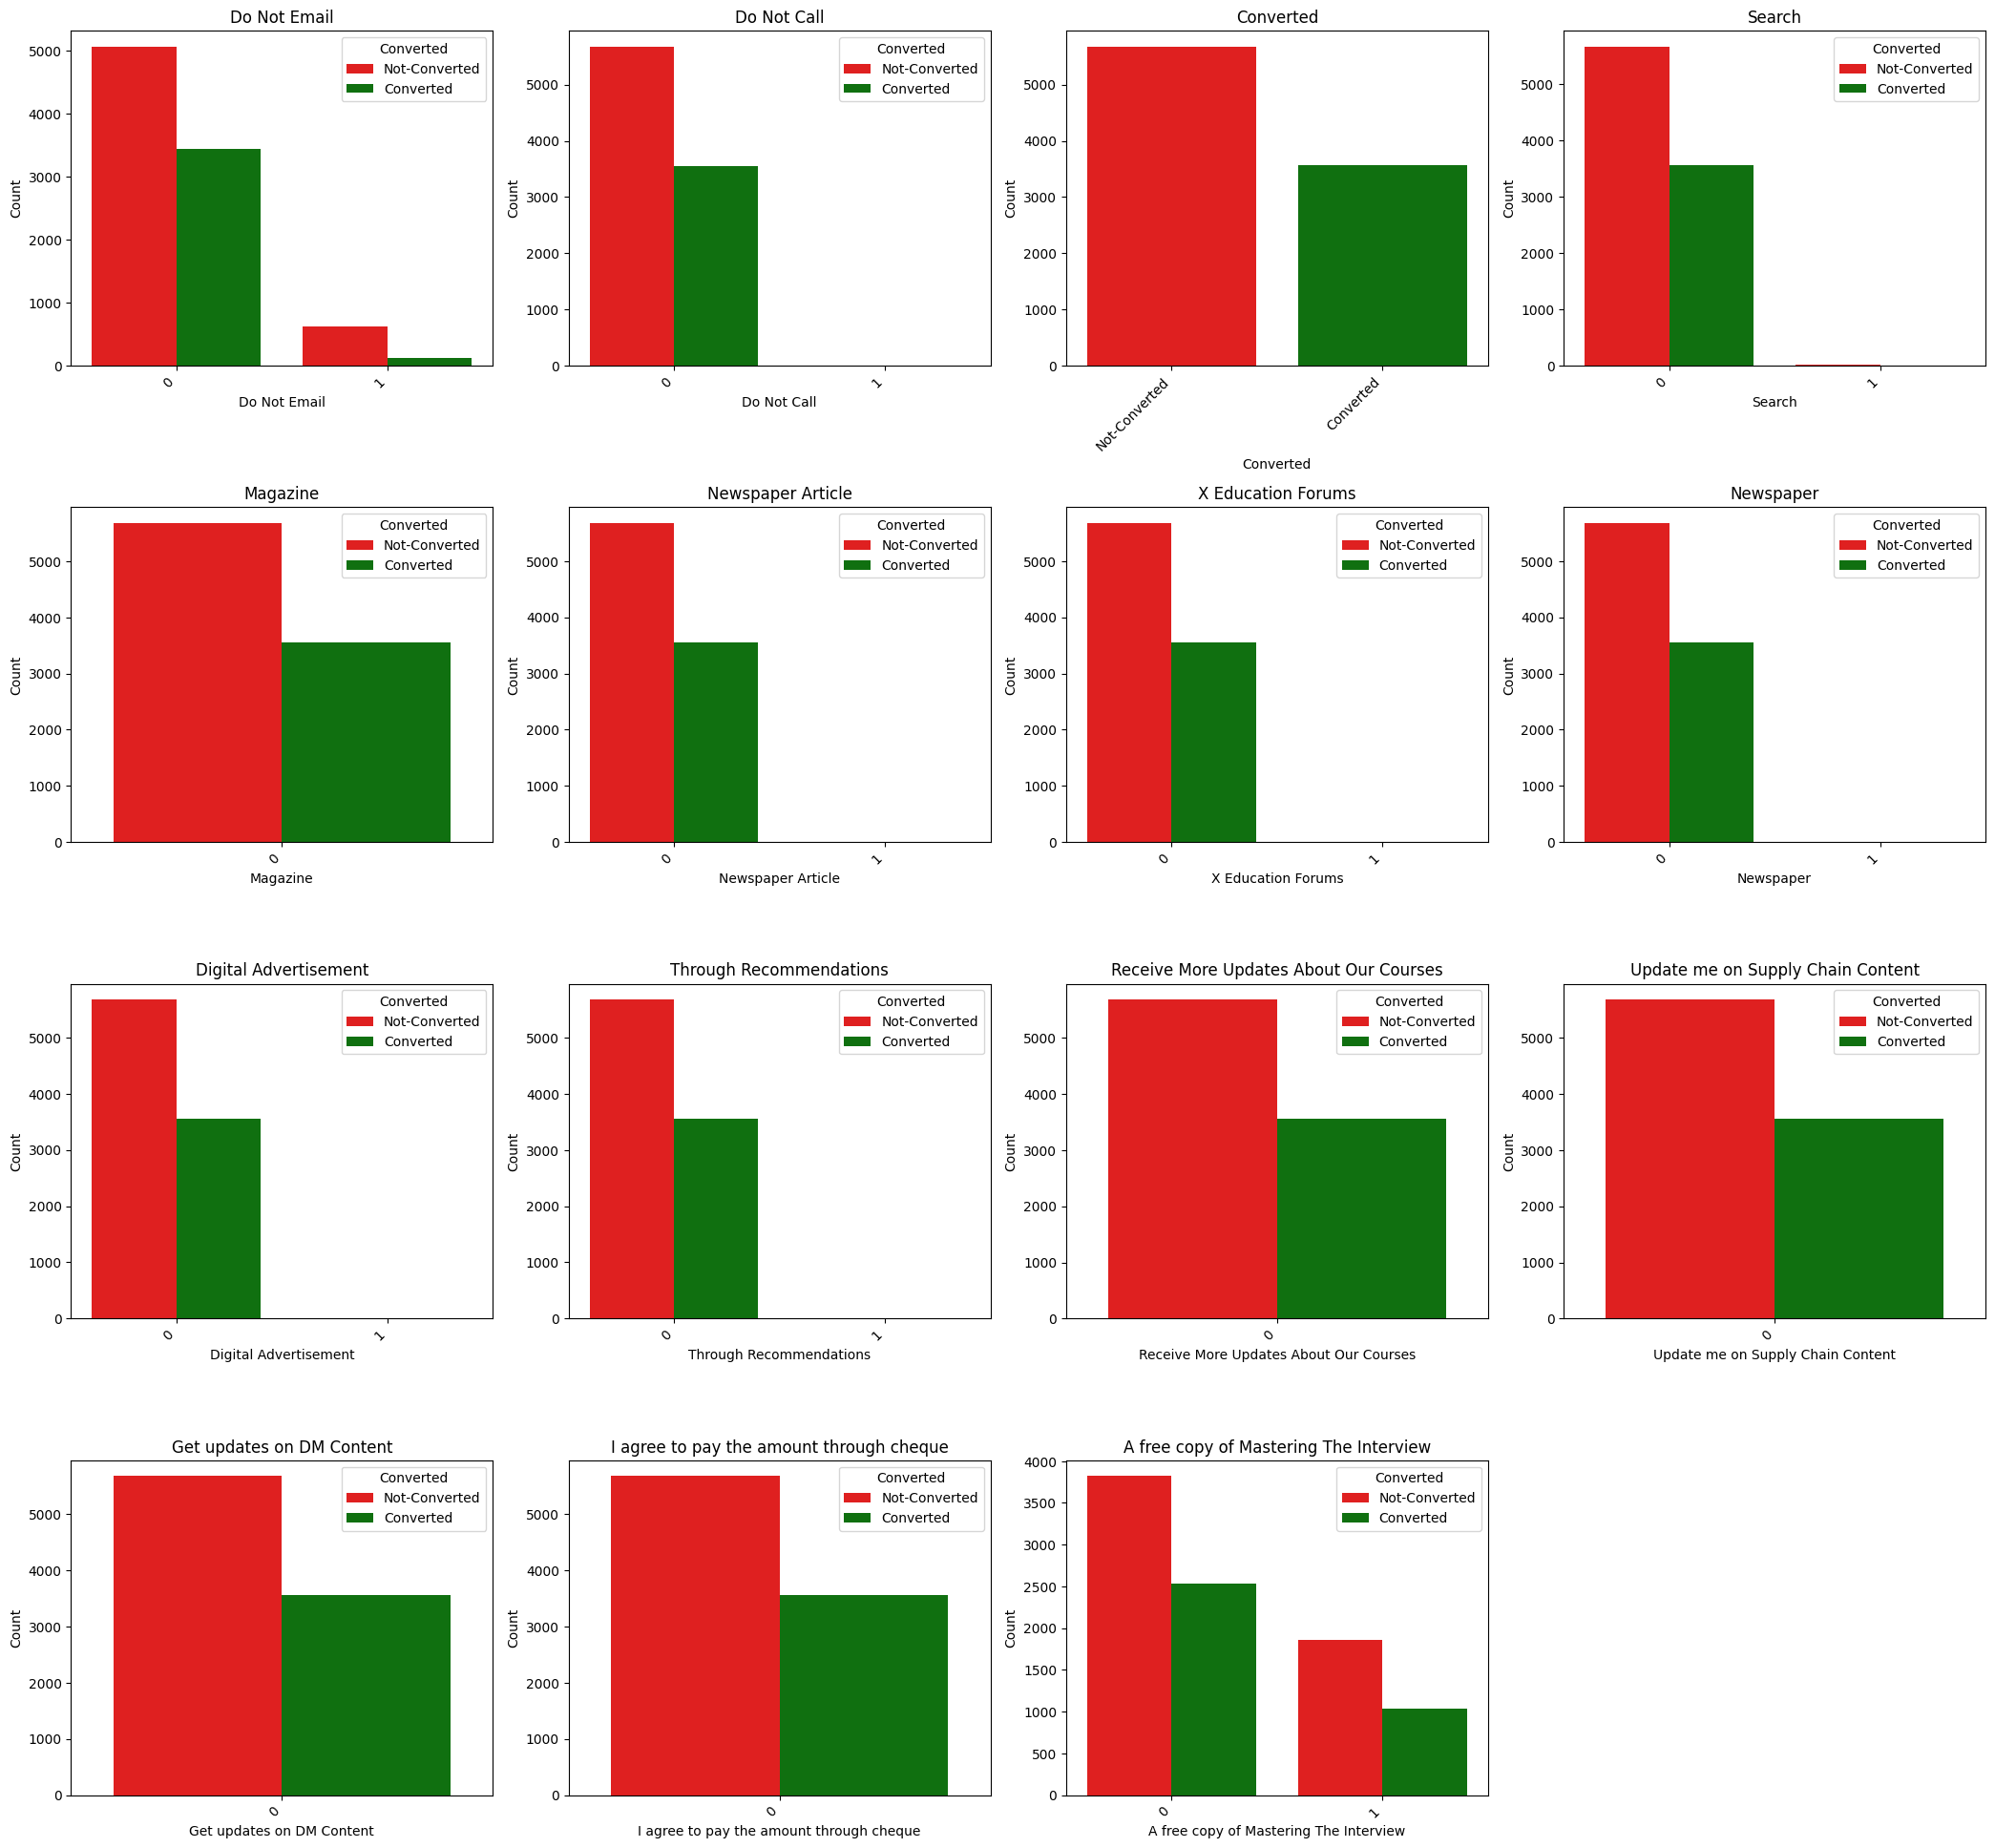

In [495]:
col_Doc = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]

df_flag = df[col_Doc].copy()  # Create a copy to avoid SettingWithCopyWarning
df_flag['Converted'] = df['Converted']  # Add the "Converted" column from the original df

# Replace 1 and 0 in Converted column with 'Converted' and 'Not-Converted'
df_flag['Converted'] = df_flag['Converted'].replace({1: 'Converted', 0: 'Not-Converted'})

# Set up the figure size (adjust as needed)
plt.figure(figsize=(21, 24))

# Loop through col_Doc and plot count plots
for i, col in enumerate(col_Doc):
    plt.subplot(5, 4, i + 1)  # Create a subplot grid (adjust rows/cols as needed)
    ax = sns.countplot(x=df_flag[col].fillna('NaN'), hue=df_flag['Converted'], palette=['r', 'g'])

    # Improve plot readability
    plt.xlabel(col, fontsize=10)   # Label x-axis with the column name
    plt.ylabel("Count", fontsize=10)  # Label y-axis 
    plt.title(col)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    
    # Optionally, add annotations for counts on top of the bars
    # for container in ax.containers:
    #     ax.bar_label(container)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Insight: 

The The above graph shows that  all columns except ```A free copy of Mastering The Interview exhibit``` minimal or no variation across the dataset. This suggests that these features do not offer meaningful information for predicting user behavior or outcomes. Therefore, it is recommended to exclude these columns from further analysis to streamline the modeling process and focus on more relevant features."

In [496]:
# Remove specified columns from col_Doc
col_Doc = [col for col in col_Doc if col not in ["A free copy of Mastering The Interview", "Converted"]]


# drop the feature under col_Doc from df

df=df.drop(col_Doc,axis=1)

In [497]:
#Dropping columns having more than 40% null values

df = df.drop(df.loc[:,list(round(df.isnull().sum()/df.shape[0], 2)>0.40)].columns,axis= 1)

In [498]:
df.shape

(9240, 15)

In [499]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified


####  Null Value Data Imputation

#### Strategy for Imputing Categorical columns

- To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.
- To impute null values in categorical variables which has higher null percentage, a new category is created.
      

In [500]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Iterate through categorical columns
for col in categorical_cols:
    missing_percent = df[col].isnull().mean() * 100  # Calculate percentage of missing values
    
    if missing_percent > 0:  # Check if there were any missing values to impute
        if missing_percent < 30: 
            # Impute with mode if missing values are less than 30%
            mode_value = df[col].mode()[0]  # Find the mode 
            df[col] = df[col].fillna(mode_value)
            print(f"Column: {col}")
            print(f"Null percentage: {missing_percent:.2f}%")
            print(f"Imputed with: {mode_value}\n")
        elif missing_percent >= 30:
            # Create "Unknown" category if missing values are 30% or more
            df[col] = df[col].fillna("Unknown")
            print(f"Column: {col}")
            print(f"Null percentage: {missing_percent:.2f}%")
            print(f"Imputed with: Unknown\n")

Column: Lead Source
Null percentage: 0.39%
Imputed with: Google

Column: Last Activity
Null percentage: 1.11%
Imputed with: Email Opened

Column: Country
Null percentage: 26.63%
Imputed with: India

Column: Specialization
Null percentage: 36.58%
Imputed with: Unknown

Column: What is your current occupation
Null percentage: 29.11%
Imputed with: Unemployed

Column: What matters most to you in choosing a course
Null percentage: 29.32%
Imputed with: Better Career Prospects

Column: Tags
Null percentage: 36.29%
Imputed with: Unknown

Column: City
Null percentage: 39.71%
Imputed with: Unknown



#### Stratergy for imputing numerical columns
- Impute the null with nearest whole number mean values as TotalVisits,Page Views Per Visit cant be in decimal.

In [501]:

# Identify numerical columns
numerical_cols = df.select_dtypes("number").columns
# Iterate through numerical columns
for col in numerical_cols:
    missing_percent = df[col].isnull().mean() * 100
    
    if missing_percent > 0:  # Check if there are any missing values
        actual_mean_value = df[col].mean()  # Calculate actual mean
        abs_mean_value = np.abs(actual_mean_value) # Calculate absolute mean
        nearest_whole_number = round(abs_mean_value)  # Round to nearest whole number
        df[col] = df[col].fillna(nearest_whole_number)

        print(f"Column: {col}")
        print(f"Null percentage: {missing_percent:.2f}%")
        print(f"Actual Mean Value: {actual_mean_value:.2f}")  # Print actual mean
        print(f"Imputed with (Rounded Mean): {nearest_whole_number}\n")

Column: TotalVisits
Null percentage: 1.48%
Actual Mean Value: 3.45
Imputed with (Rounded Mean): 3

Column: Page Views Per Visit
Null percentage: 1.48%
Actual Mean Value: 2.36
Imputed with (Rounded Mean): 2



In [502]:
df.shape

(9240, 15)

In [503]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,Better Career Prospects,Interested in other courses,Unknown,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,Ringing,Unknown,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified


In [504]:
 # Checking missing data percentage in the updated dataframe

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

#### Data Analysis

#### Imbalance Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\599947736.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Conversion Status", y="Count", data=Imbalance, palette=['r', 'g'])


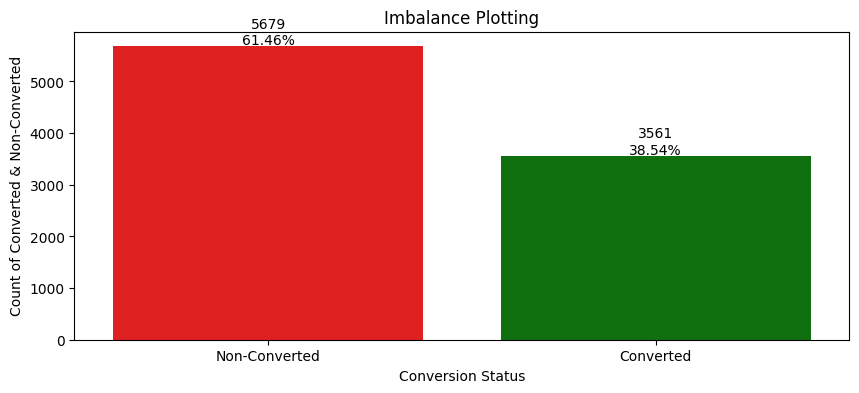

In [505]:
# Assuming df is your DataFrame and "Converted" is the column of interest
Imbalance = df["Converted"].value_counts().reset_index()
Imbalance.columns = ['Conversion Status', 'Count']

# Map 0 and 1 to 'Non-Converted' and 'Converted'
Imbalance['Conversion Status'] = Imbalance['Conversion Status'].map({0: 'Non-Converted', 1: 'Converted'})

# Calculate the conversion rates
total = Imbalance['Count'].sum()
Imbalance['Rate'] = (Imbalance['Count'] / total * 100).round(2)

plt.figure(figsize=(10, 4))
barplot = sns.barplot(x="Conversion Status", y="Count", data=Imbalance, palette=['r', 'g'])

# Adding the count and conversion rate annotations
for p, label, rate in zip(barplot.patches, Imbalance['Count'], Imbalance['Rate']):
    height = p.get_height()
    barplot.annotate(f'{label}\n{rate}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', fontsize=10, color='black', 
                     xytext=(0, 10), textcoords='offset points')

plt.xlabel("Conversion Status")
plt.ylabel("Count of Converted & Non-Converted")
plt.title("Imbalance Plotting")
plt.show()

Conversion rate is approx 38% hence the data is balanced. 

 <!-- Segmented Univariate Analysis

We will replace values in categorical columns that have a frequency of less than 3% with a new category called "Others"

 -->


#### EDA- Categrorical columns

In [506]:
def consolidate_categorical_values(df, threshold_percentage=0.05):
    """
    Consolidate categorical values with frequency less than the specified threshold into 'Others'.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing categorical columns.
    - threshold_percentage (float): The frequency threshold below which values will be consolidated into 'Others'.
    
    Returns:
    - pd.DataFrame: The DataFrame with consolidated categorical values.
    """
    # Loop through each categorical column in the DataFrame
    for col in df.select_dtypes(include='object').columns:
        # Calculate value counts and frequencies
        value_counts = df[col].value_counts(normalize=True)
        
        # Identify values with frequency less than the threshold
        to_replace = value_counts[value_counts < threshold_percentage].index
        
        # Replace these values with 'Others'
        df[col] = df[col].replace(to_replace, 'Others')
        
        # Optional: Print the updated value counts to verify changes
        print(f"Updated value counts for {col}:")
        print(df[col].value_counts(normalize=True))
        print("_________________________________________________________________________________________________")
    
    return df


In [507]:
df = consolidate_categorical_values(df, threshold_percentage=0.05)

Updated value counts for Lead Origin:
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: proportion, dtype: float64
_________________________________________________________________________________________________
Updated value counts for Lead Source:
Lead Source
Google            0.314286
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Others            0.037879
Name: proportion, dtype: float64
_________________________________________________________________________________________________
Updated value counts for Last Activity:
Last Activity
Email Opened               0.383117
SMS Sent                   0.297078
Others                     0.145238
Olark Chat Conversation    0.105303
Page Visited on Website    0.069264
Name: proportion, dtype: float64
_________________________________________________________________

#### Segemented Univariate Anaysis of Categorical Columns

In [508]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def univariate_categorical(features, df, ylog=False, label_rotation=False):
    """
    This function plots univariate analysis of categorical columns in a DataFrame
    showing only the count plot with conversion rates.

    Args:
        features (list): A list of categorical column names.
        df (pandas DataFrame): The DataFrame containing the data.
        ylog (bool, optional): Whether to use log scale for the count plot. Defaults to False.
        label_rotation (bool, optional): Whether to rotate x-axis labels. Defaults to False.
    """

    for feature in features:
        # Calculate counts and percentages
        cat_counts = df[feature].value_counts()
        cat_perc = df.groupby(feature)['Converted'].mean().mul(100)

        # Sort categories by conversion rate (descending)
        cat_perc_sorted = cat_perc.sort_values(ascending=False)

        # Create the figure and axes
        plt.figure(figsize=(12, 6))

        # Count plot with conversion percentages
        ax = sns.countplot(x=feature, data=df, hue="Converted", order=cat_perc_sorted.index, palette=['r', 'g'])
        ax.set_title(f"{feature} Distribution by Conversion", fontdict={'fontsize': 12, 'fontweight': 'bold'})
        ax.legend(['Non Converted', 'Converted'])
        if ylog:
            ax.set_yscale('log')
            ax.set_ylabel("Count (log)", fontdict={'fontsize': 10})
        if label_rotation:
            plt.xticks(rotation=45, ha='right')

        # Add percentage annotations to the bars
        for container in ax.containers:
            total = len(df[feature])  # Get total count for the feature
            for p in container.patches:  # Iterate over the bars
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2  # X position of the label
                y = p.get_height()  # Y position of the label
                ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8)

        plt.show()

In [509]:
categorical_columns = df.select_dtypes(include=['object']).columns


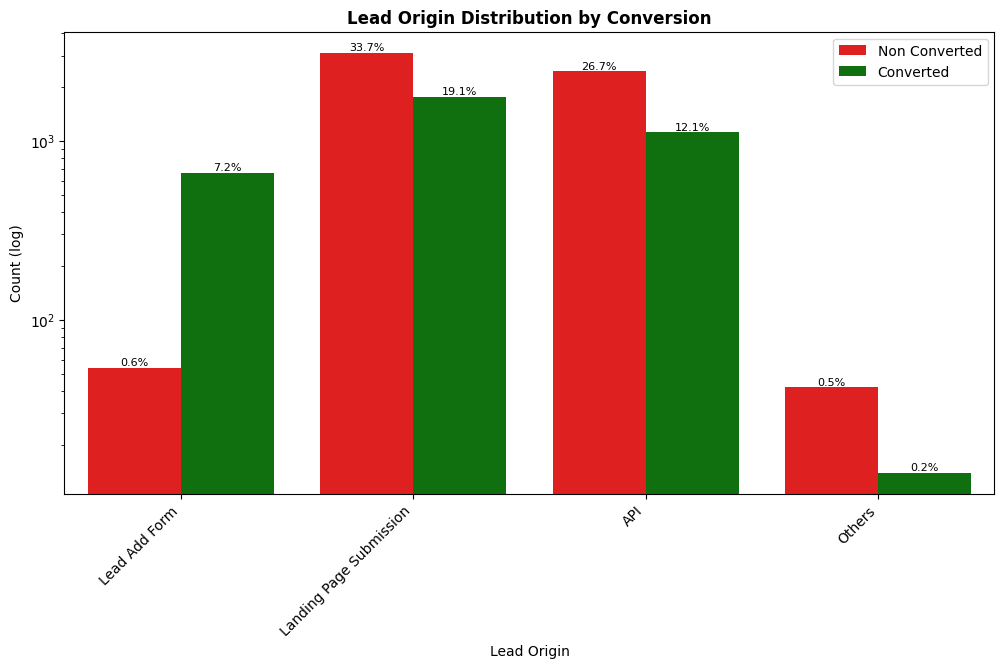

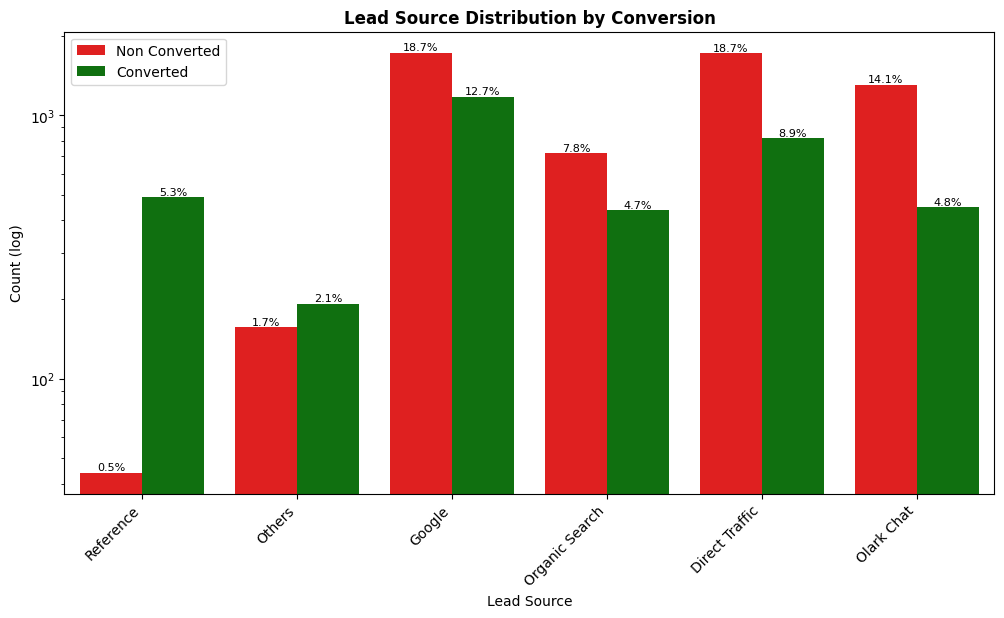

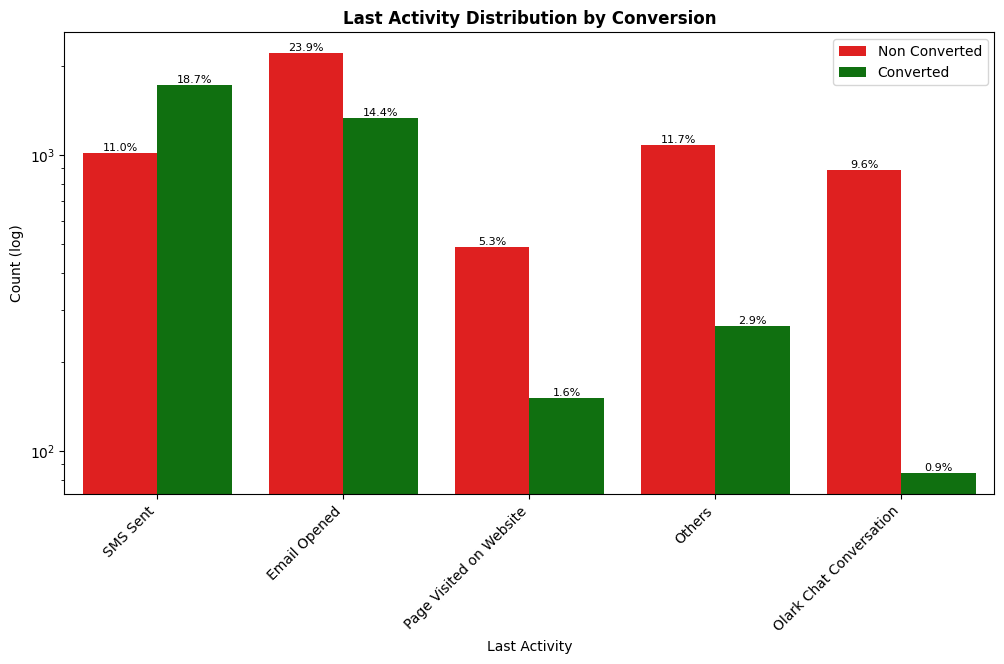

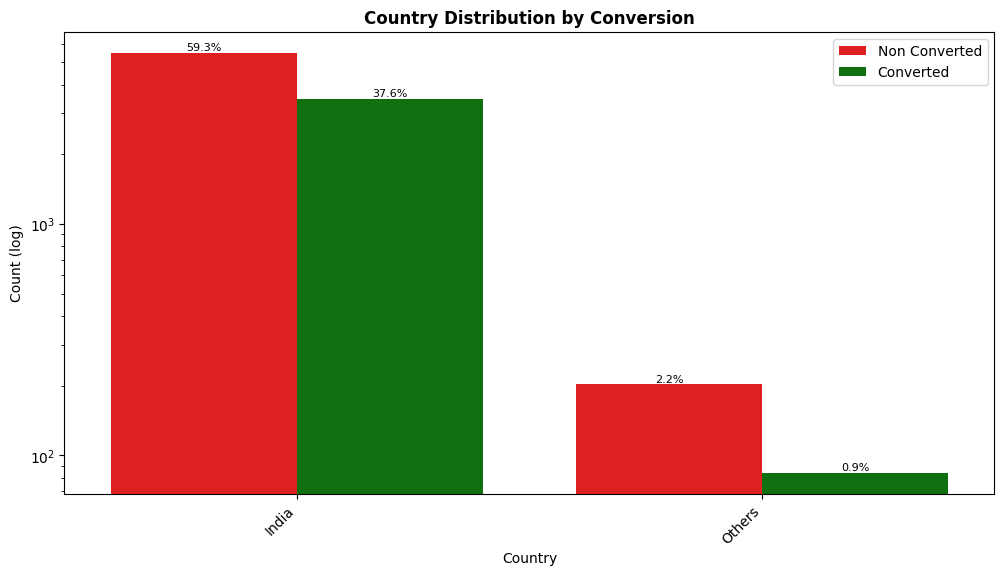

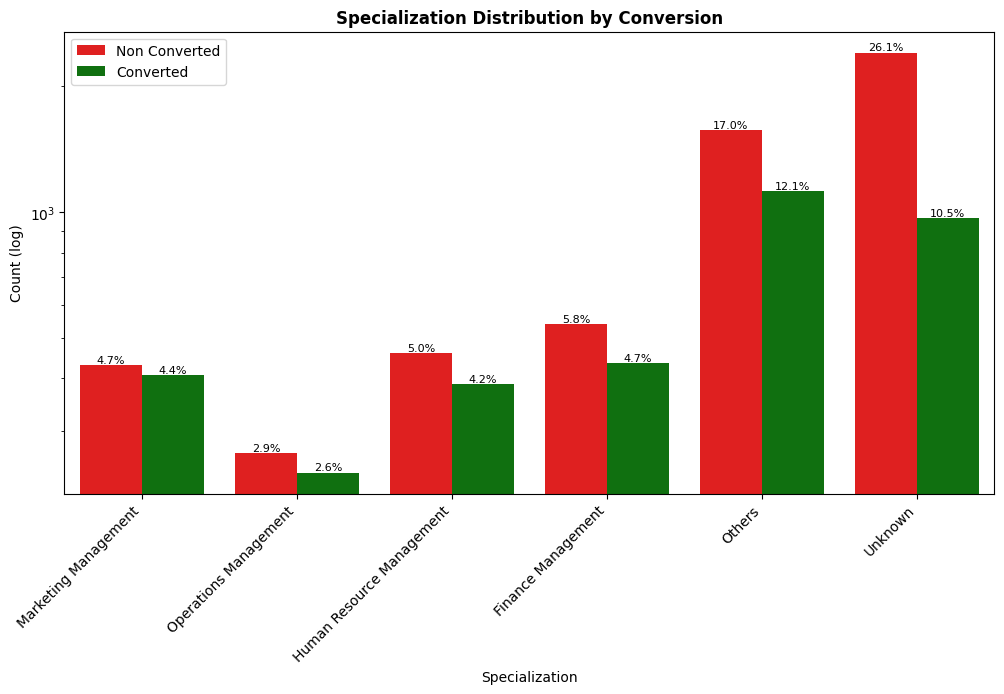

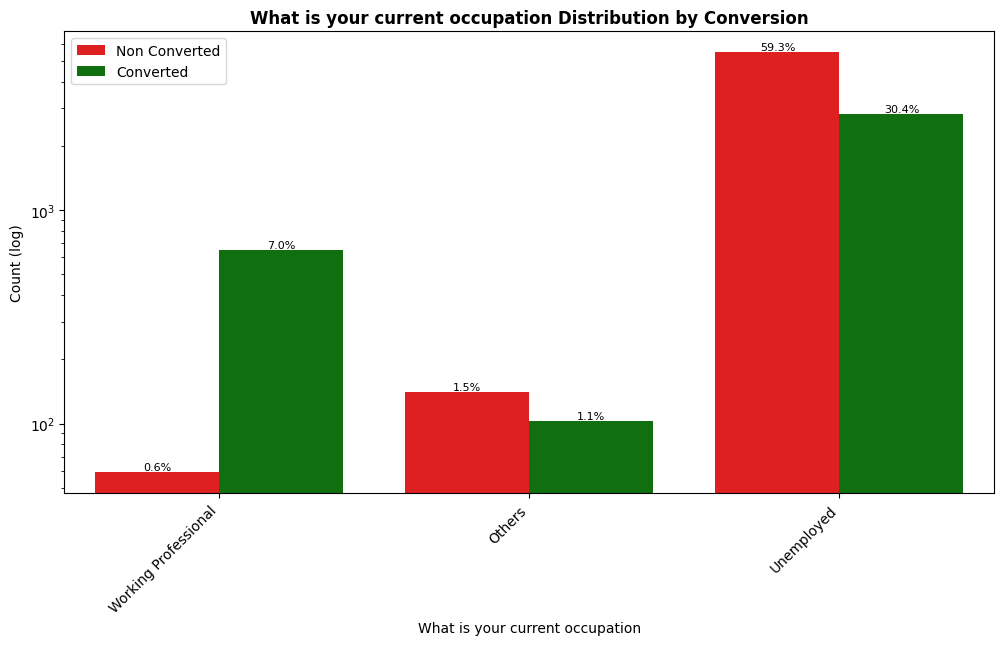

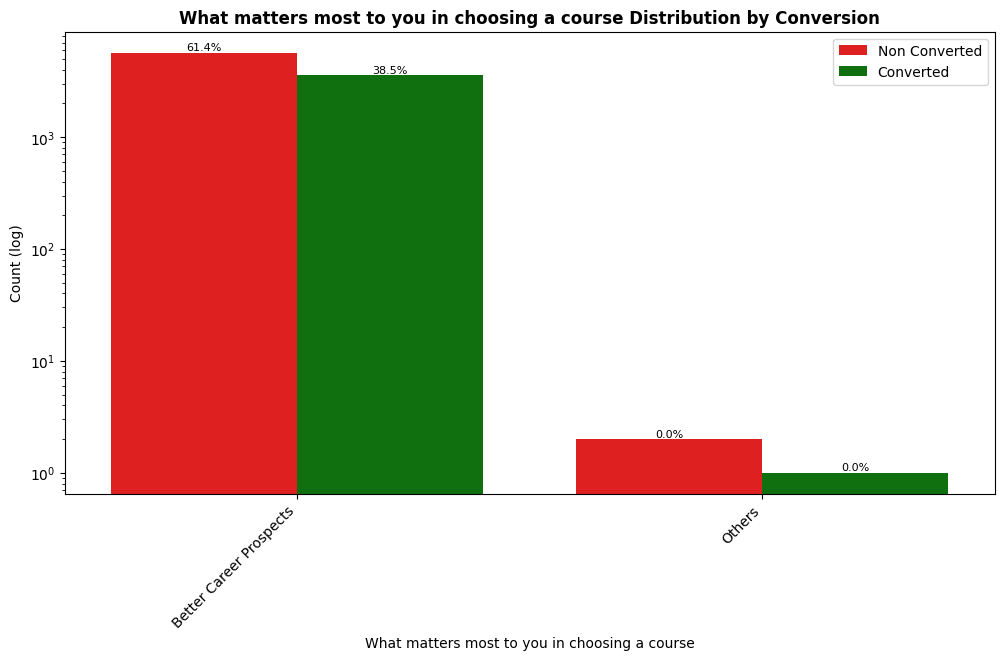

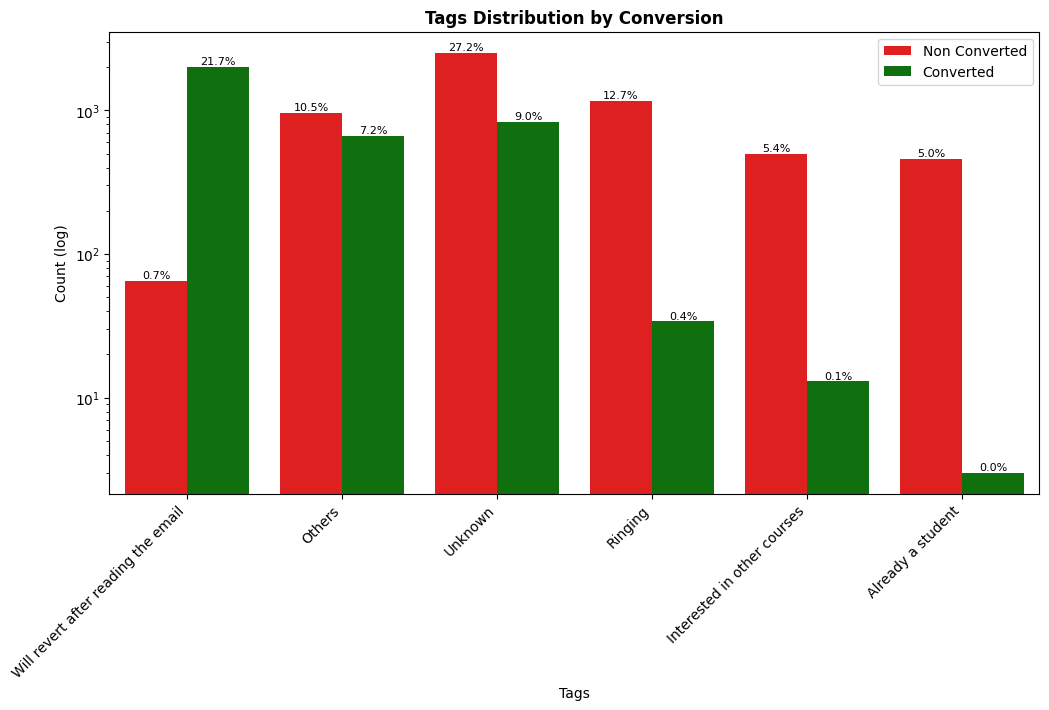

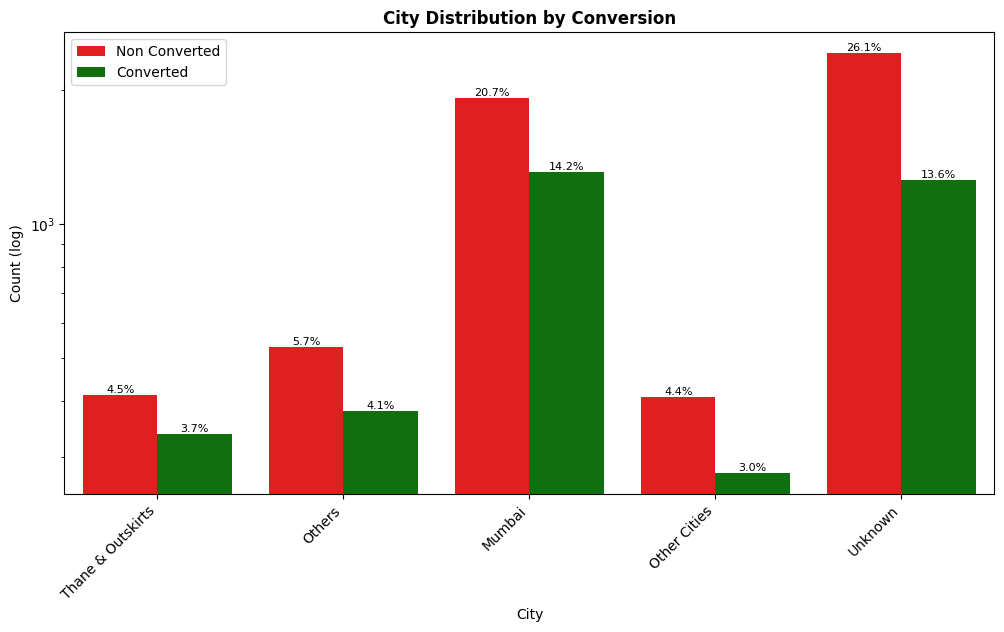

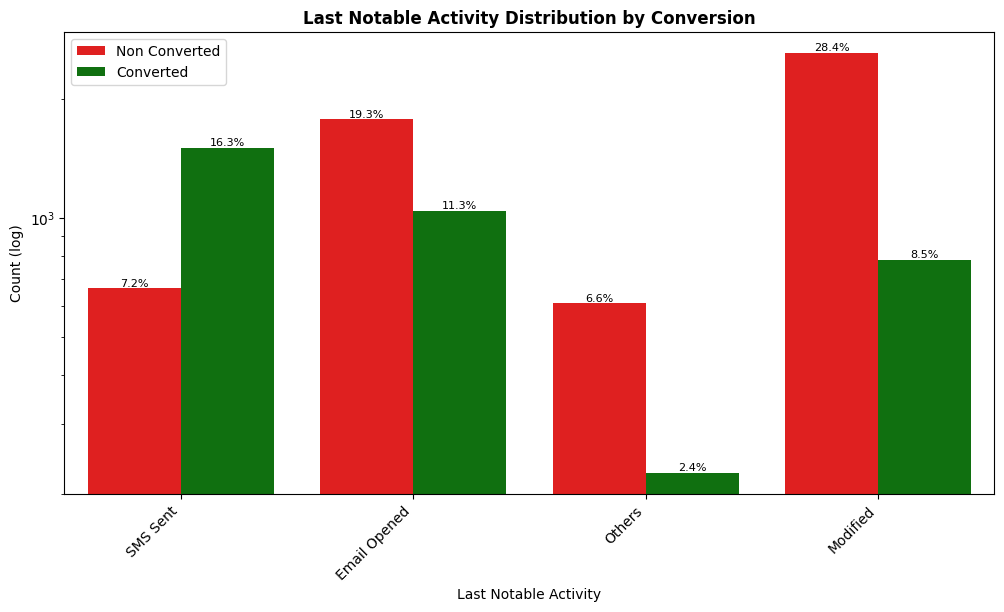

In [510]:

univariate_categorical(categorical_columns, df, ylog=True, label_rotation=True) 

Insights:

- Recommendation: Focus on enhancing the Lead Add Form process and consider increasing efforts in this area. For landing page source and API, investigate ways to optimize their performance to boost conversion rates.

-  References generate the highest conversion rate at 91.76%, suggesting that referrals are a valuable source of conversions. So we need to focus more on references and see how we can optimize Google and Direct traffic performance

- "SMS Sent activities have a notable conversion rate of 62.91%, highlighting the effectiveness of SMS communication in lead conversion. So we need to invest more in SMS activities. 

- "Working Professionals have an extremely high conversion rate of 91.64%, making them a prime target for lead conversion strategies.

- Better Career Prospects is the most critical factor for 48.87% of the leads, indicating the importance of career advancement in decision-making.

- SMS Sent as the last notable activity has the highest conversion rate at 69.43%, reaffirming the impact of SMS in finalizing conversions.

In [511]:
# Since Country and Specialization are not having any predictive power so we can drop these columns

df=df.drop(["Specialization","Country"],axis=1)

In [512]:
#  We can clearly observe that the conversion rate  of  others except  revert after email are very less are close to negligible  hence we can club them into "Others" source for better visualisation and analysis
df['Tags']=df['Tags'].replace(["Unknown", "Ringing","Unknown","Interested in other courses", "Already a student"],"Others")

In [513]:
# We can club Mumbai and Thane together and club other as other cities

df["City"]=df["City"].replace(["Mumbai","Thane & Outskirts"],"Mumbai & Outskirts")
df["City"]=df["City"].replace(["Other Cities","Unknown"],"Others")


In [514]:
# def calculate_categorical_conversion(df, target_column):
#     # Get all categorical columns
#     categorical_columns = df.select_dtypes(include=['object']).columns

#     result_tables = {}

#     for feature in categorical_columns:
#         # Calculate counts and conversion rates
#         cat_counts = df[feature].value_counts()
#         cat_perc = df.groupby(feature)[target_column].mean().mul(100)

#         # Combine into a DataFrame
#         table = pd.DataFrame({
#             'Count': cat_counts,
#             'Conversion Rate (%)': cat_perc
#         }).sort_values(by='Conversion Rate (%)', ascending=False)

#         result_tables[feature] = table

#     return result_tables

# # Assuming df is your DataFrame and "Converted" is the target column
# result_tables = calculate_categorical_conversion(df, "Converted")

# # Display the results
# for feature, table in result_tables.items():
#     print(f"Feature: {feature}")
#     print(table)
#     print("_________________________________________________________________________________________________")

#### Segmented Univariate Analysis of numerical columns

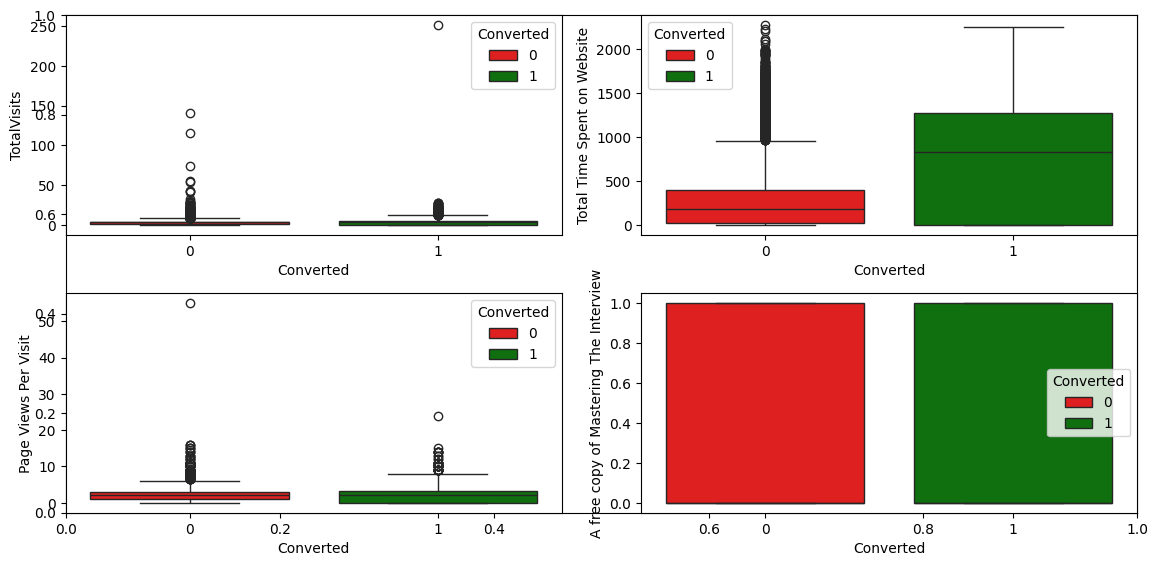

In [515]:
fig=plt.subplots(figsize=(12, 6))

for i, feature in enumerate(['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted',hue='Converted', data = df, palette=['r', 'g'])
    plt.tight_layout()

#### Impute Outliers

#### Apply IQR to replace outliers with upper and lower bound` separately based on the Converted column (i.e., segmented by Converted


In [516]:
def apply_iqr(df, columns):
    """
    Apply IQR method to cap outliers for specified columns in the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to process.
    - columns (list): List of columns to apply IQR method on.
    
    Returns:
    - pd.DataFrame: DataFrame with outliers capped.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Specify columns to process
columns_to_process = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']

# Split data based on 'Converted' column
converted_df = df[df['Converted'] == 1]
non_converted_df = df[df['Converted'] == 0]

# Apply IQR method to each segment
converted_df = apply_iqr(converted_df, columns_to_process)
non_converted_df = apply_iqr(non_converted_df, columns_to_process)

# Combine the segments back into a single DataFrame
df = pd.concat([converted_df, non_converted_df])

# Optional: Reset index after concatenation
df = df.reset_index(drop=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\1826503767.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\1826503767.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\1826503767.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

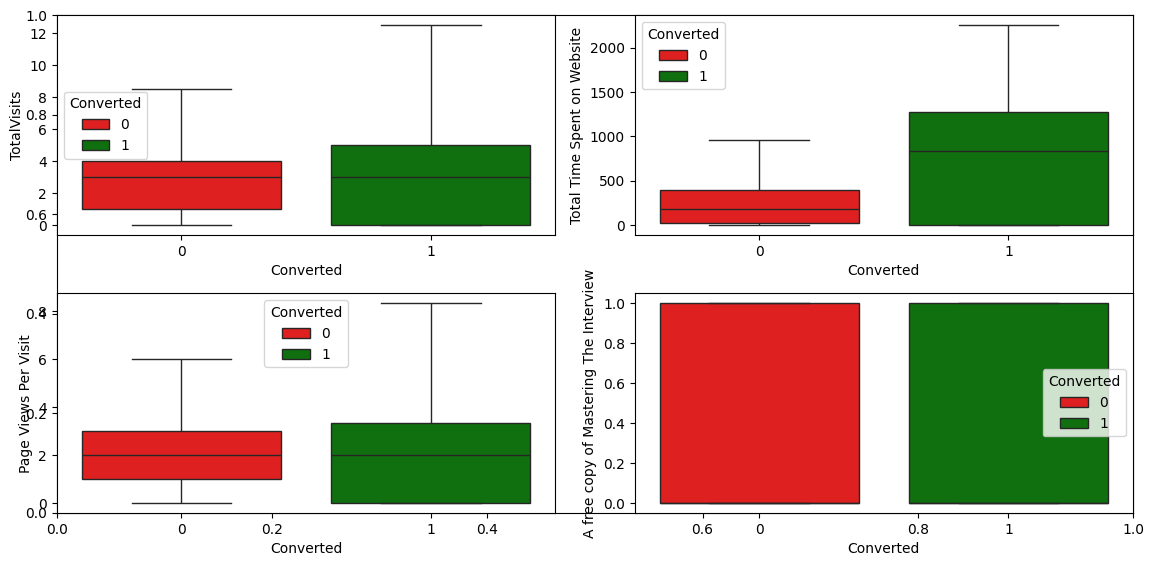

In [517]:
fig=plt.subplots(figsize=(12, 6))

for i, feature in enumerate(['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted',hue='Converted', data = df, palette=['r', 'g'])
    plt.tight_layout()

Insights:

- Total time spent on website is higher by the leads who are getting converted also there are many outliers in the non conversion leads. 
- Mediam for Total Visits,Page View per Vist, of both converted and non converted are same but upper bound is higher for converted leads. 
- Nothong can be predicted with A free copy of Mastering The Interview colums so we can drop it





In [518]:
df=df.drop("A free copy of Mastering The Interview",axis=1)

In [519]:
df.shape

(9240, 12)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)


In [520]:
# Find Categorical Columns with more than two unique values

categorical_columns = df.select_dtypes(include=['object']).columns

# Strip leading and trailing spaces from categorical columns (if any)
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip())



In [521]:
df[categorical_columns]

,Lead Origin,Lead Source,Last Activity,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,Landing Page Submission,Direct Traffic,Email Opened,Others,Better Career Prospects,Will revert after reading the email,Mumbai & Outskirts,Email Opened
1,Landing Page Submission,Google,Others,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai & Outskirts,Modified
2,Landing Page Submission,Google,Email Opened,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai & Outskirts,Modified
3,Landing Page Submission,Organic Search,Email Opened,Unemployed,Better Career Prospects,Will revert after reading the email,Others,Email Opened
4,Landing Page Submission,Direct Traffic,Page Visited on Website,Unemployed,Better Career Prospects,Others,Mumbai & Outskirts,Others
...,...,...,...,...,...,...,...,...
9235,API,Olark Chat,SMS Sent,Unemployed,Better Career Prospects,Others,Others,Modified
9236,Landing Page Submission,Google,Email Opened,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai & Outskirts,Email Opened
9237,Landing Page Submission,Direct Traffic,SMS Sent,Unemployed,Better Career Prospects,Others,Mumbai & Outskirts,SMS Sent
9238,Landing Page Submission,Direct Traffic,SMS Sent,Unemployed,Better Career Prospects,Others,Mumbai & Outskirts,SMS Sent


In [522]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Lead Origin': ['Landing Page Submission' 'API' 'Lead Add Form' 'Others']
Unique values in 'Lead Source': ['Direct Traffic' 'Google' 'Organic Search' 'Others' 'Olark Chat'
 'Reference']
Unique values in 'Last Activity': ['Email Opened' 'Others' 'Page Visited on Website'
 'Olark Chat Conversation' 'SMS Sent']
Unique values in 'What is your current occupation': ['Others' 'Unemployed' 'Working Professional']
Unique values in 'What matters most to you in choosing a course': ['Better Career Prospects' 'Others']
Unique values in 'Tags': ['Will revert after reading the email' 'Others']
Unique values in 'City': ['Mumbai & Outskirts' 'Others']
Unique values in 'Last Notable Activity': ['Email Opened' 'Modified' 'Others' 'SMS Sent']


In [523]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[categorical_columns],prefix_sep="_", dtype="int", drop_first=True)



In [524]:
df = pd.concat([df, dummy1], axis=1)

In [525]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Tags,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Will revert after reading the email,City_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.00,Email Opened,Others,Better Career Prospects,Will revert after reading the email,...,0,0,0,0,0,1,0,0,0,0
1,Landing Page Submission,Google,1,2.0,1428.0,1.00,Others,Unemployed,Better Career Prospects,Will revert after reading the email,...,0,0,1,0,0,1,0,1,0,0
2,Landing Page Submission,Google,1,2.0,1640.0,2.00,Email Opened,Unemployed,Better Career Prospects,Will revert after reading the email,...,0,0,1,0,0,1,0,1,0,0
3,Landing Page Submission,Organic Search,1,8.0,1351.0,8.00,Email Opened,Unemployed,Better Career Prospects,Will revert after reading the email,...,0,0,1,0,0,1,1,0,0,0
4,Landing Page Submission,Direct Traffic,1,8.0,1343.0,2.67,Page Visited on Website,Unemployed,Better Career Prospects,Others,...,1,0,1,0,0,0,0,0,1,0


#### Drop the categorical columns

In [526]:
df=df.drop(categorical_columns,axis=1)

In [527]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Will revert after reading the email,City_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,1,2.0,1532.0,2.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,2.0,1428.0,1.00,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,2.0,1640.0,2.00,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3,1,8.0,1351.0,8.00,1,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
4,1,8.0,1343.0,2.67,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [528]:
df.shape

(9240, 24)

In [529]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   float64
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   int64  
 5   Lead Origin_Lead Add Form                             9240 non-null   int64  
 6   Lead Origin_Others                                    9240 non-null   int64  
 7   Lead Source_Google                                    9240 non-null   int64  
 8   Lead Source_Olark Chat                                9240

### Step 3: Looking at Correlations

In [530]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form              Lead Source_Reference                       0.853237
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent              0.852707
TotalVisits                            Page Views Per Visit                        0.762729
Converted                              Tags_Will revert after reading the email    0.644307
Page Views Per Visit                   Lead Origin_Landing Page Submission         0.541014
TotalVisits                            Lead Origin_Landing Page Submission         0.449714
Converted                              Total Time Spent on Website                 0.437428
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation       0.426248
TotalVisits                            Total Time Spent on Website                 0.387125
Last Activity_Page Visited on Website  Last Notable Activity_Others                0.387096
dtype: float64

High Feature Correlations
- Lead Origin_Lead Add Form:Lead Source_Reference ;   
- Last Activity_SMS Sent :Last Notable Activity_SMS Sent 
- TotalVisits :   Page Views Per Visit                  
 are highly correlated. This indicates potential redundancy. Consider dropping one feature from each pair.

In [531]:
columns_to_drop = ['Lead Source_Reference', 
                   'Last Activity_SMS Sent',
                   'Page Views Per Visit',
                   ]

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [532]:
df.shape

(9240, 21)

### Step 4: Test-Train Split

In [533]:
from sklearn.model_selection import train_test_split

In [534]:
# Putting feature variable to X
X = df.drop("Converted", axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Will revert after reading the email,City_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,2.0,1532.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2.0,1428.0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0
2,2.0,1640.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,8.0,1351.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
4,8.0,1343.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


In [535]:
y=df["Converted"]

In [536]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Converted, dtype: int64

In [537]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 5: Feature Scaling

In [538]:
from sklearn.preprocessing import StandardScaler

In [539]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website']]=scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])

In [540]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Will revert after reading the email,City_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4715,-0.777371,-0.525394,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
7132,-1.139204,-0.903727,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
8954,-1.139204,-0.903727,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5283,-0.415537,-0.105465,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3003,1.755461,2.552767,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1


### Step 6: Model Building


In [541]:
# Logistic regression model


import statsmodels.api as sm

In [542]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1709.4
Date:                Sat, 20 Jul 2024   Deviance:                       3418.7
Time:                        13:45:49   Pearson chi2:                 5.69e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5510
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2745      0.372     -6.109      0.000      -3.004      -1.545
TotalVisits                                              0.3142      0.061      5.133      0.000       0.194       0.434
Total Time Spent on Website                              1.6542      0.062     26.481      0.000       1.532       1.777
Lead Origin_Landing Page Submission                     -0.3690      0.145     -2.546      0.011      -0.653      -0.085
Lead Origin_Lead Add Form                                5.0095      0.269     18.643      0.000       4.483       5.536
Lead Origin_Others                                      -0.0782      0.635     -0.123      0.902      -1.322       1.165
Lead Source_Google                                       0.2542      0.125      2.027      0.043       0.008       0.500
Lead Source_Olark Chat                                   2.3878      0.203     11.764      0.000       1.990       2.786
Lead Source_Organic Search                              -0.1665      0.168     -0.989      0.323      -0.496       0.163
Lead Source_Others                                       0.5679      0.263      2.159      0.031       0.052       1.083
Last Activity_Olark Chat Conversation                   -1.7962      0.227     -7.915      0.000      -2.241      -1.351
Last Activity_Others                                    -1.0750      0.182     -5.910      0.000      -1.432      -0.719
Last Activity_Page Visited on Website                   -1.2409      0.238     -5.215      0.000      -1.707      -0.774
What is your current occupation_Unemployed               0.0153      0.329      0.046      0.963      -0.630       0.661
What is your current occupation_Working Professional     1.4912      0.412      3.620      0.000       0.684       2.299
What matters most to you in choosing a course_Others     2.6166      1.656      1.580      0.114      -0.630       5.863
Tags_Will revert after reading the email                 4.6177      0.187     24.728      0.000       4.252       4.984
City_Others                                             -0.0369      0.116     -0.318      0.750      -0.264       0.190
Last Notable Activity_Modified                           0.2493      0.131      1.901      0.057      -0.008       0.506
Last Notable Activity_Others                             0.9675      0.233      4.155      0.000       0.511       1.424
Last Notable Activity_SMS Sent                           1.3965      0.119     11.776      0.000       1.164       1.629
========================================================================================================================
"""

### Step 7: Feature Selection Using RFE

In [543]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [544]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [545]:
rfe.support_

array([False,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
        True,  True])

In [546]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', np.False_, np.int64(3)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Lead Origin_Landing Page Submission', np.True_, np.int64(1)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Others', np.False_, np.int64(7)),
 ('Lead Source_Google', np.False_, np.int64(4)),
 ('Lead Source_Olark Chat', np.True_, np.int64(1)),
 ('Lead Source_Organic Search', np.False_, np.int64(2)),
 ('Lead Source_Others', np.True_, np.int64(1)),
 ('Last Activity_Olark Chat Conversation', np.True_, np.int64(1)),
 ('Last Activity_Others', np.True_, np.int64(1)),
 ('Last Activity_Page Visited on Website', np.True_, np.int64(1)),
 ('What is your current occupation_Unemployed', np.False_, np.int64(8)),
 ('What is your current occupation_Working Professional',
  np.True_,
  np.int64(1)),
 ('What matters most to you in choosing a course_Others',
  np.False_,
  np.int64(5)),
 ('Tags_Will revert after reading the email', np.True_, np.int64(1)),
 ('City_Others', np.False_

In [547]:
col = X_train.columns[rfe.support_]

In [548]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [549]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Origin_Others', 'Lead Source_Google',
       'Lead Source_Organic Search',
       'What is your current occupation_Unemployed',
       'What matters most to you in choosing a course_Others', 'City_Others',
       'Last Notable Activity_Modified'],
      dtype='object')

##### Assessing the model with StatsModels

In [550]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1730.0
Date:                Sat, 20 Jul 2024   Deviance:                       3460.1
Time:                        13:45:50   Pearson chi2:                 4.23e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5481
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0138      0.115    -17.587      0.000      -2.238      -1.789
Total Time Spent on Website                              1.6877      0.062     27.174      0.000       1.566       1.809
Lead Origin_Landing Page Submission                     -0.3236      0.117     -2.768      0.006      -0.553      -0.094
Lead Origin_Lead Add Form                                4.6116      0.239     19.336      0.000       4.144       5.079
Lead Source_Olark Chat                                   1.9137      0.160     11.930      0.000       1.599       2.228
Lead Source_Others                                       0.4662      0.238      1.962      0.050       0.000       0.932
Last Activity_Olark Chat Conversation                   -1.6593      0.208     -7.967      0.000      -2.068      -1.251
Last Activity_Others                                    -1.0455      0.158     -6.635      0.000      -1.354      -0.737
Last Activity_Page Visited on Website                   -0.9479      0.217     -4.362      0.000      -1.374      -0.522
What is your current occupation_Working Professional     1.4702      0.256      5.739      0.000       0.968       1.972
Tags_Will revert after reading the email                 4.6033      0.184     24.980      0.000       4.242       4.964
Last Notable Activity_Others                             0.8391      0.189      4.447      0.000       0.469       1.209
Last Notable Activity_SMS Sent                           1.2700      0.108     11.774      0.000       1.059       1.481
========================================================================================================================
"""

In [551]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.013794
7132    0.164463
8954    0.164463
5283    0.260155
3003    0.999608
478     0.823284
1352    0.978535
3166    0.990670
7700    0.412088
2647    0.991471
dtype: float64

In [552]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01379441, 0.16446284, 0.16446284, 0.26015479, 0.99960821,
       0.82328368, 0.97853512, 0.99066971, 0.41208751, 0.99147085])

##### Creating a dataframe with the actual lead conversion and the predicted probabilities

In [553]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.013794,4715
1,0,0.164463,7132
2,0,0.164463,8954
3,0,0.260155,5283
4,1,0.999608,3003


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [554]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.013794,4715,0
1,0,0.164463,7132,0
2,0,0.164463,8954,0
3,0,0.260155,5283,0
4,1,0.999608,3003,1


In [555]:
from sklearn import metrics

In [556]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3820  183]
 [ 465 2000]]


In [557]:
# [[3820  183]
# [ 465 2000]]
# True Positives (TP): 1667 (Predicted Converted and actually Converted)
# True Negatives (TN): 3439 (Predicted Not Converted and actually Not Converted)
# False Positives (FP): 545 (Predicted Converted but actually Not Converted)
# False Negatives (FN): 817 (Predicted Not Converted but actually Converted)

In [558]:
# Let's check the overall accuracy.
print("Accuracy score",metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8998144712430427


#### Checking VIFs

In [559]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [560]:
def calculate_vif(df, col_names):
    """
    Calculate VIF for the columns in the DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - col_names: List of column names for which VIF needs to be calculated.

    Returns:
    - DataFrame with columns 'Features' and 'VIF' sorted by VIF in descending order.
    """
    # Subset the DataFrame with the specified columns
    df_subset = df[col_names]
    
    # Calculate VIF for each column
    vif_data = pd.DataFrame()
    vif_data['Features'] = df_subset.columns
    vif_data['VIF'] = [variance_inflation_factor(df_subset.values, i) for i in range(df_subset.shape[1])]
    vif_data['VIF'] = round(vif_data['VIF'], 2)
    
    # Sort by VIF in descending order
    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    
    return vif_data


In [561]:
vif_result = calculate_vif(X_train, col)
print(vif_result)

                                             Features   VIF
0            Tags_Will revert after reading the email  1.78
1                              Lead Source_Olark Chat  1.64
2                 Lead Origin_Landing Page Submission  1.63
3                      Last Notable Activity_SMS Sent  1.51
4                        Last Notable Activity_Others  1.47
5               Last Activity_Olark Chat Conversation  1.44
6                         Total Time Spent on Website  1.39
7               Last Activity_Page Visited on Website  1.38
8                           Lead Origin_Lead Add Form  1.36
9                                Last Activity_Others  1.34
10  What is your current occupation_Working Profes...  1.29
11                                 Lead Source_Others  1.11


All variables have a good value of VIF. But we observed earlier that the column "Lead Source_Others" has high p-value and hence we will drop this column and remake the model.

In [562]:
col = col.drop('Lead Source_Others')
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [563]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.9
Date:                Sat, 20 Jul 2024   Deviance:                       3463.9
Time:                        13:45:52   Pearson chi2:                 4.80e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5478
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9659      0.112    -17.627      0.000      -2.185      -1.747
Total Time Spent on Website                              1.6798      0.062     27.143      0.000       1.558       1.801
Lead Origin_Landing Page Submission                     -0.3617      0.115     -3.143      0.002      -0.587      -0.136
Lead Origin_Lead Add Form                                4.7297      0.232     20.348      0.000       4.274       5.185
Lead Source_Olark Chat                                   1.8603      0.158     11.805      0.000       1.551       2.169
Last Activity_Olark Chat Conversation                   -1.6583      0.208     -7.984      0.000      -2.065      -1.251
Last Activity_Others                                    -1.0513      0.158     -6.665      0.000      -1.360      -0.742
Last Activity_Page Visited on Website                   -0.9439      0.218     -4.337      0.000      -1.371      -0.517
What is your current occupation_Working Professional     1.4492      0.257      5.633      0.000       0.945       1.953
Tags_Will revert after reading the email                 4.6089      0.184     25.011      0.000       4.248       4.970
Last Notable Activity_Others                             0.8457      0.189      4.485      0.000       0.476       1.215
Last Notable Activity_SMS Sent                           1.2639      0.108     11.748      0.000       1.053       1.475
========================================================================================================================
"""

In [564]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.013906,4715,0
1,0,0.164692,7132,0
2,0,0.164692,8954,0
3,0,0.258159,5283,0
4,1,0.999604,3003,1


In [565]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9008967223252937


The Accuracy is increased slightly from 89 to 90%

##### Let's now check the VIFs again

In [566]:
vif_result = calculate_vif(X_train, col)
print(vif_result)

                                             Features   VIF
0            Tags_Will revert after reading the email  1.78
1                              Lead Source_Olark Chat  1.64
2                 Lead Origin_Landing Page Submission  1.63
3                      Last Notable Activity_SMS Sent  1.51
4                        Last Notable Activity_Others  1.47
5               Last Activity_Olark Chat Conversation  1.43
6                         Total Time Spent on Website  1.39
7               Last Activity_Page Visited on Website  1.37
8                                Last Activity_Others  1.34
9   What is your current occupation_Working Profes...  1.29
10                          Lead Origin_Lead Add Form  1.26


All variables have a good value of VIF and P value<0.05. So we need not drop any more variables and we can proceed with making predictions using this model only

In [567]:
from sklearn import metrics
from sklearn.metrics import precision_score

In [568]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [569]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3825  178]
 [ 463 2002]]
Accuracy : 0.9008967223252937
Sensitivity : 0.8121703853955375
Specificity : 0.9555333499875094
Precision : 0.918348623853211


(0.9008967223252937,
 np.float64(0.8121703853955375),
 np.float64(0.9555333499875094),
 np.float64(0.918348623853211))

### Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [570]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [571]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

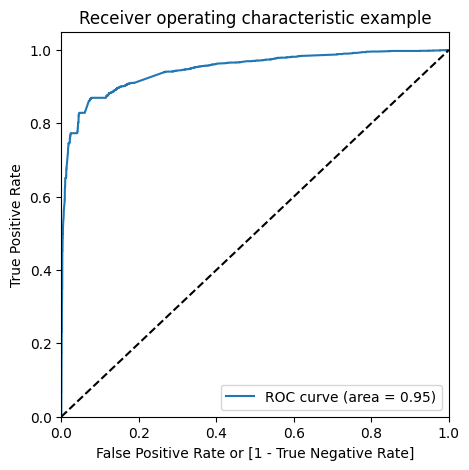

In [572]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [573]:
# Create columns for different probability cutoffs
numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)

# Display the DataFrame to ensure columns are created correctly
print(y_train_pred_final.head())




   Convert  Convert_Prob  Pros_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.013906     4715          0    1    0    0    0    0    0   
1        0      0.164692     7132          0    1    1    0    0    0    0   
2        0      0.164692     8954          0    1    1    0    0    0    0   
3        0      0.258159     5283          0    1    1    1    0    0    0   
4        1      0.999604     3003          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    1    1    1    1  


In [574]:
# List to store scores
score_list = []

# Calculate scores for various probability cutoffs
for i in numbers:
    y_pred = y_train_pred_final[i]
    accuracy_score, sensitivity_score, specificity_score, precision_sc = evaluate_model(y_train_pred_final.Convert, y_pred)
    score_list.append({'probability_score': i,
                       'accuracy_score': accuracy_score,
                       'sensitivity_score': sensitivity_score,
                       'specificity_score': specificity_score,
                       'precision_score': precision_sc})

# Convert list to DataFrame
score_df = pd.DataFrame(score_list)

score_df


,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0,0.0,0.381107,1.000000,0.000000,0.381107
1,0.1,0.761441,0.955781,0.641769,0.621636
2,0.2,0.861163,0.903043,0.835373,0.771577
3,0.3,0.878479,0.881947,0.876343,0.814537
4,0.4,0.902134,0.861258,0.927305,0.879453
5,0.5,0.900897,0.812170,0.955533,0.918349
6,0.6,0.893012,0.788641,0.957282,0.919149
7,0.7,0.893166,0.755375,0.978016,0.954872
8,0.8,0.864255,0.664503,0.987260,0.969805
9,0.9,0.844001,0.605274,0.991007,0.976440


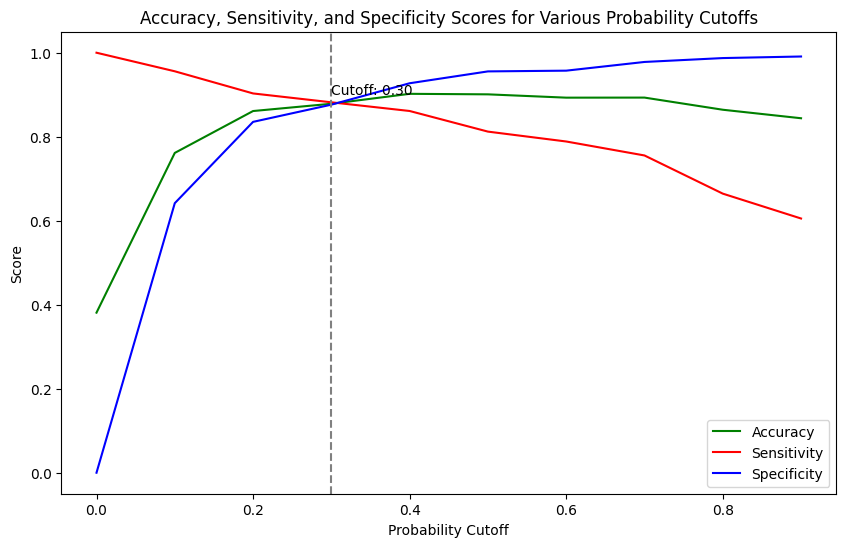

In [575]:
# Plotting the accuracy, sensitivity, and specificity scores
plt.figure(figsize=(10, 6))
plt.plot(score_df['probability_score'], score_df['accuracy_score'], label='Accuracy', color='green')
plt.plot(score_df['probability_score'], score_df['sensitivity_score'], label='Sensitivity', color='red')
plt.plot(score_df['probability_score'], score_df['specificity_score'], label='Specificity', color='blue')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity, and Specificity Scores for Various Probability Cutoffs')
plt.legend()

# Finding the intersection point
intersection_index = np.argwhere(np.isclose(score_df['sensitivity_score'], score_df['specificity_score'], atol=0.01)).flatten()
intersection_points = score_df.iloc[intersection_index]

for index, row in intersection_points.iterrows():
    plt.axvline(x=row['probability_score'], color='gray', linestyle='--')
    plt.annotate(f"Cutoff: {row['probability_score']:.2f}", (row['probability_score'], row['sensitivity_score'] + 0.02))

plt.show()

### Precision-Recall Trade off

In [576]:
from sklearn.metrics import precision_score, precision_recall_curve


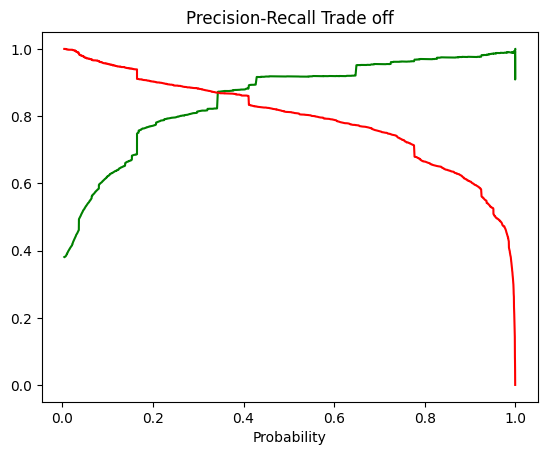

In [577]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

Insight:

In Sensitivity-Specificity-Accuracy plot 0.3 probability looks optimal.
In Precision-Recall Curve 0.35 looks optimal.

We are taking 0.3 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [578]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.013906,4715,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.164692,7132,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.164692,8954,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.258159,5283,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.999604,3003,1,1,1,1,1,1,1,1,1,1,1,1


In [579]:
# Evaluating model performance on training data


evaluate_model(y_train_pred_final.Convert, y_train_pred_final['final_predicted'], print_score=True)

Confusion Matrix :
 [[3508  495]
 [ 291 2174]]
Accuracy : 0.87847866419295
Sensitivity : 0.881947261663286
Specificity : 0.8763427429427929
Precision : 0.8145372798801049


(0.87847866419295,
 np.float64(0.881947261663286),
 np.float64(0.8763427429427929),
 np.float64(0.8145372798801049))

## Precision and Recall

##### Precision
TP / TP + FP

In [580]:
# confusion[1,1]/(confusion[0,1]+confusion[1,1])

##### Recall
TP / TP + FN

In [581]:
# confusion[1,1]/(confusion[1,0]+confusion[1,1])

Using sklearn utilities for the same

### Step 10: Making predictions on the test set

In [582]:
X_test[['TotalVisits', 'Total Time Spent on Website']]=scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [583]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,Tags_Will revert after reading the email,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4608,-0.903727,0,0,1,1,0,0,0,0,0,0
7935,-0.551145,1,0,0,0,0,0,0,0,0,0
4043,-0.802706,0,0,0,0,0,0,0,0,0,0
7821,-0.903727,0,0,1,1,0,0,0,0,1,0
856,-0.903727,0,0,1,0,0,0,0,1,0,0


In [584]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,4608,0.036193,0,4
1,0,7935,0.037205,0,4
2,0,4043,0.035084,0,4
3,0,7821,0.080444,0,8
4,1,856,0.951901,1,95


In [585]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1413  263]
 [ 142  954]]
Accuracy : 0.8538961038961039
Sensitivity : 0.8704379562043796
Specificity : 0.8430787589498807
Precision : 0.7838948233360723


(0.8538961038961039,
 np.float64(0.8704379562043796),
 np.float64(0.8430787589498807),
 np.float64(0.7838948233360723))

Making predictions on the test set

#### Step 11 : Final Model

In [130]:
y_test_pred = res.predict(X_test_sm)

In [586]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [587]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.3)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4715          0             0.013906                  0           1
1         7132          0             0.164692                  0          16
2         8954          0             0.164692                  0          16
3         5283          0             0.258159                  0          26
4         3003          1             0.999604                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4608          0             0.036193                  0           4
1         7935          0             0.037205                  0           4
2         4043          0             0.035084                  0           4
3         7821          0             0.080444                  0           8
4          856          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4608,0,0.036193,0,4
1,7935,0,0.037205,0,4
2,4043,0,0.035084,0,4
3,7821,0,0.080444,0,8
4,856,1,0.951901,1,95
...,...,...,...,...,...
2767,4184,0,0.168949,0,17
2768,5023,0,0.133243,0,13
2769,6661,0,0.011418,0,1
2770,2201,1,0.077548,0,8


In [588]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -1.965935
Total Time Spent on Website                             1.679757
Lead Origin_Landing Page Submission                    -0.361672
Lead Origin_Lead Add Form                               4.729656
Lead Source_Olark Chat                                  1.860251
Last Activity_Olark Chat Conversation                  -1.658297
Last Activity_Others                            

### Conclusion:

- The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.


- Here, the logistic regression model is used to predict the probabilty of conversion of a customer. 


- Optimum cut off is chosen to be 0.3 i.e. 
any lead with greater than 0.3 probability of converting is predicted as Hot Lead (customer will convert) and
any lead with 0.3 or less probability of converting is predicted as Cold Lead (customer will not convert)


- Our final Logistic Regression Model is built with 11 features.


- Features used in final model are ['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent']
       
- The top three categorical/dummy variables in the final model are ‘Lead Source_Olark Chat ’, ‘Lead Origin_Lead Add Form’, ‘Tags_Will revert after reading the email ’ with respect to the absolute value of their coefficient factors. 

'Last Activity_Olark Chat Conversation', 'Last Activity_Others','Last Activity_Page Visited on Website'are obtained by encoding original categorical variable "Last Activity.
‘Lead Quality_Worst’ is obtained by encoding the categorical variable ‘Lead Quality’.
       




- The final model has Sensitivity of 0.928, this means the model is able to predict 92% customers out of all the converted customers, (Positive conversion) correctly.


- The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads.


- We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)

In [593]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Last Activity_Others,Last Activity_Page Visited on Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Will revert after reading the email,City_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,1,2.0,1532.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,2.0,1428.0,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
2,1,2.0,1640.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,1,8.0,1351.0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,8.0,1343.0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


#### Question

X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

In [595]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.1)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4715          0             0.013906                  0           1
1         7132          0             0.164692                  1          16
2         8954          0             0.164692                  1          16
3         5283          0             0.258159                  1          26
4         3003          1             0.999604                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4608          0             0.036193                  0           4
1         7935          0             0.037205                  0           4
2         4043          0             0.035084                  0           4
3         7821          0             0.080444                  0           8
4          856          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4608,0,0.036193,0,4
1,7935,0,0.037205,0,4
2,4043,0,0.035084,0,4
3,7821,0,0.080444,0,8
4,856,1,0.951901,1,95
...,...,...,...,...,...
2767,4184,0,0.168949,1,17
2768,5023,0,0.133243,1,13
2769,6661,0,0.011418,0,1
2770,2201,1,0.077548,0,8


#### Question
	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [596]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4715          0             0.013906                  0           1
1         7132          0             0.164692                  0          16
2         8954          0             0.164692                  0          16
3         5283          0             0.258159                  0          26
4         3003          1             0.999604                  1         100
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4608          0             0.036193                  0           4
1         7935          0             0.037205                  0           4
2         4043          0             0.035084                  0           4
3         7821          0             0.080444                  0           8
4          856          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4608,0,0.036193,0,4
1,7935,0,0.037205,0,4
2,4043,0,0.035084,0,4
3,7821,0,0.080444,0,8
4,856,1,0.951901,1,95
...,...,...,...,...,...
2767,4184,0,0.168949,0,17
2768,5023,0,0.133243,0,13
2769,6661,0,0.011418,0,1
2770,2201,1,0.077548,0,8
